In [261]:
import os

In [262]:
import urllib

In [263]:
import zipfile

In [264]:
ls

Exploration 2.ipynb       Exploration 4-test.ipynb  Exploration.ipynb
Exploration 3.ipynb       Exploration 4.ipynb       dask-worker-space/


# Data

Let's establish the path of a new data folder just for this notebook so we can download the data into it from the notebook.

In [265]:
data_folder_path = "../"

dataFolderName = "Data-Exploration-4"

In [266]:
data_folder_path = os.path.join(data_folder_path,dataFolderName)
data_folder_path

'../Data-Exploration-4'

In [267]:
!mkdir "../Data-Exploration-4"

mkdir: ../Data-Exploration-4: File exists


### Flowlines for Water Bodies from USGS

Next let's download vector data for rivers in the Houston area.

We'll be using the "NHDPlus High Resolution (NHDPlus HR), National Hydrography Dataset (NHD), and Watershed Boundary Dataset (WBD) " dataset from USGS as described here: https://www.usgs.gov/national-hydrography/access-national-hydrography-products

There are a variety of ways to download this data, we'll just use a dataset that overlaps with central Houston for now as we care about Buffal Bayou: https://prd-tnm.s3.amazonaws.com/index.html?prefix=StagedProducts/Hydrography/NHD/HU8/Shape/

And in particular this one: "NHD_H_12040104_HU8_Shape" at 

In [268]:
download_link_NHD_H_12040104_HU8_Shape = "https://prd-tnm.s3.amazonaws.com/StagedProducts/Hydrography/NHD/HU8/Shape/NHD_H_12040104_HU8_Shape.zip"

In [269]:
file_path_rivers_NHD = os.path.join(data_folder_path,"rivers_NHD.zip")

In [270]:
urllib.request.urlretrieve(download_link_NHD_H_12040104_HU8_Shape, file_path_rivers_NHD)

('../Data-Exploration-4/rivers_NHD.zip',
 <http.client.HTTPMessage at 0x1567cf1c0>)

In [271]:
file_path_unzipped_rivers_NHD = os.path.join(data_folder_path,"rivers_NHD")

In [272]:
with zipfile.ZipFile(file_path_rivers_NHD, 'r') as zip_ref:
    zip_ref.extractall(file_path_unzipped_rivers_NHD)

In [273]:
cd "../Data-Exploration-3"

/Users/justingosses/Code/river-maps-experiments/Data-Exploration-3


In [274]:
ls

buffaloBayouTestGeojson.geojson  rivers_NHD/
landcover_USGS_CONUS/            rivers_NHD.zip
landcover_USGS_texas.zip


In [275]:
cd rivers_NHD

/Users/justingosses/Code/river-maps-experiments/Data-Exploration-3/rivers_NHD


In [276]:
ls

NHD_H_12040104_HU8_Shape.jpg  Shape/
NHD_H_12040104_HU8_Shape.xml


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['interactive', 'Widget', 'stack', 'isnan', 'Polygon', 'copy', 'random', 'Circle', 'Rectangle']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


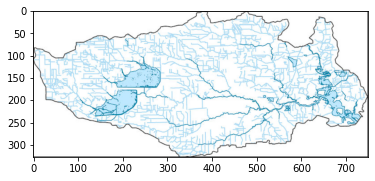

In [277]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('NHD_H_12040104_HU8_Shape.jpg')
imgplot = plt.imshow(img)
plt.show()

In [278]:
cd Shape

/Users/justingosses/Code/river-maps-experiments/Data-Exploration-3/rivers_NHD/Shape


In [279]:
ls

ExternalCrosswalk.dbf        NHDWaterbody.dbf
NHDArea.dbf                  NHDWaterbody.prj
NHDArea.prj                  NHDWaterbody.shp
NHDArea.shp                  NHDWaterbody.shx
NHDArea.shx                  WBDHU10.dbf
NHDAreaEventFC.dbf           WBDHU10.prj
NHDAreaEventFC.prj           WBDHU10.shp
NHDAreaEventFC.shp           WBDHU10.shx
NHDAreaEventFC.shx           WBDHU12.dbf
NHDFCode.dbf                 WBDHU12.prj
NHDFeatureToMetadata.dbf     WBDHU12.shp
NHDFlow.dbf                  WBDHU12.shx
NHDFlowline.dbf              WBDHU14.dbf
NHDFlowline.prj              WBDHU14.prj
NHDFlowline.shp              WBDHU14.shp
NHDFlowline.shx              WBDHU14.shx
NHDFlowlineVAA.dbf           WBDHU16.dbf
NHDLine.dbf                  WBDHU16.prj
NHDLine.prj                  WBDHU16.shp
NHDLine.shp                  WBDHU16.shx
NHDLine.shx                  WBDHU2.dbf
NHDLineEventFC.dbf           WBDHU2.prj
NHDLineEventFC.prj           WBDHU2.shp
NHDLineEventFC.shp           WBDHU2.shx


In [280]:
cd ../../../notebooks

/Users/justingosses/Code/river-maps-experiments/notebooks


In [281]:
ls

Exploration 2.ipynb       Exploration 4-test.ipynb  Exploration.ipynb
Exploration 3.ipynb       Exploration 4.ipynb       dask-worker-space/


## Loading Data

### Flowlines for Water Bodies from USGS

In [282]:
import geopandas as gpd

In [283]:
file_path_rivers_NHD_shapeFile = os.path.join(file_path_unzipped_rivers_NHD,"Shape","NHDFlowline.shp")

In [284]:
shapefile = gpd.read_file(file_path_rivers_NHD_shapeFile )
print(type(shapefile))
print(shapefile)

<class 'geopandas.geodataframe.GeoDataFrame'>
     permanent_       fdate  resolution   gnis_id              gnis_name  \
0     113253061  2012-01-04           2      None                   None   
1     109566003  2012-01-04           2      None                   None   
2     113254783  2012-01-04           2  01373919           Greens Bayou   
3     113255589  2012-01-04           2      None                   None   
4     113255303  2012-01-04           2      None                   None   
...         ...         ...         ...       ...                    ...   
2877  113251823  2012-01-04           2      None                   None   
2878  113252195  2012-01-04           2      None                   None   
2879  113254411  2012-01-04           2      None                   None   
2880  113253935  2012-01-04           2  01374616  Little Whiteoak Bayou   
2881  113255137  2014-12-05           2      None                   None   

      lengthkm       reachcode  flowdir w

In [285]:
from ipyleaflet import *
import random


In [286]:
center = (29.7604, -95.498)

m2 = Map(center=center, zoom=13)

marker = Marker(location=center, draggable=True)
m2.add_layer(marker);


def random_color(feature):
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }

riverGeoData = GeoData(geo_dataframe = shapefile)

m2.add_layer(riverGeoData)


display(m2)

# Now that the marker is on the Map, you can drag it with your mouse,
# it will automatically update the `marker.location` attribute in Python

# You can also update the marker location from Python, that will update the
# marker location on the Map:
marker.location = (50, 356)

Task exception was never retrieved
future: <Task finished name='Task-911374' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911375' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911394' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911395' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911413' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911414' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911433' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911434' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911450' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911451' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911471' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911472' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911488' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911489' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911507' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911508' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911527' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911528' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911546' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911547' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911565' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911566' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911583' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911584' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911601' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911602' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911619' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911620' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911638' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911640' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911658' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911659' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911678' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911679' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911696' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911697' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911713' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911714' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Task exception was never retrieved
future: <Task finished name='Task-911733' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-911734' coro=<Client._gather.<locals>.wait() done, defined at /Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py:2006> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/client.py", line 2015, in wait
    raise AllExit()
distributed.client.AllExit
Task e

Map(center=[29.7604, -95.498], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Now we will just look at Buffalo Bayou instead of all fhte GNIS water body elements

In [287]:
test = shapefile[shapefile['gnis_name']!='Buffalo Bayou 3452']

In [288]:
test['gnis_name'].unique()

array([None, 'Greens Bayou', 'Sims Bayou', 'West Canal', 'Langham Creek',
       'Bear Creek', 'Cotton Patch Bayou', 'Brays Bayou', 'Buffalo Bayou',
       'Garners Bayou', 'Whiteoak Bayou', 'Carpenters Bayou',
       'Willow Fork', 'Spring Branch', 'South Mayde Creek', 'Plum Creek',
       'Snake Creek', 'Little Prong', 'Vince Bayou', 'Briar Branch',
       'Vogel Creek', 'Bering Ditch', 'Mason Creek', 'Berry Bayou',
       'Little Whiteoak Bayou', 'Halls Bayou', 'Rummel Creek',
       'Horsepen Creek', 'Goose Creek', 'Hunting Bayou', 'Patrick Bayou',
       'Keegans Bayou', 'San Jacinto River Authority Canal',
       'San Jacinto River', 'Willow Waterhole Bayou', 'Cole Creek',
       'East Fork Patrick Bayou', 'Cane Island Branch', 'Turkey Creek',
       'Tucker Bayou', 'Country Club Bayou', 'Reinhardt Bayou',
       'Jackson Bayou', 'Dinner Creek', 'Williams Gully', 'Berry Creek',
       'Panther Creek', 'Rolling Fork', 'West Fork Goose Creek',
       'Little Vince Bayou', 'Boggy Ba

In [289]:
geodf_buffaloBayou = shapefile[shapefile['gnis_name']=='Buffalo Bayou']

In [290]:
geodf_buffaloBayou.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [291]:
geodf_buffaloBayou.length

/var/folders/ry/tr7t3nh122z_0n6rz2cl3lv40000gn/T/ipykernel_92447/724724451.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodf_buffaloBayou.length


47      0.003579
89      0.001425
136     0.003018
180     0.016738
197     0.006626
          ...   
2801    0.010228
2804    0.009728
2813    0.027208
2829    0.005220
2862    0.011094
Length: 76, dtype: float64

In [292]:
geodf_buffaloBayou 

,permanent_,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_per,ftype,fcode,mainpath,innetwork,visibility,SHAPE_Leng,Enabled,ObjectID,geometry
47,113254399,2012-01-04,2,01372802,Buffalo Bayou,0.359,12040104000055,1,None,460,46006,0,1,5000000,0.003579,1,48,"LINESTRING Z (-95.48178 29.77218 0.00000, -95...."
89,113254947,2012-01-04,2,01372802,Buffalo Bayou,0.139,12040104002441,1,120007513,558,55800,0,1,5000000,0.001425,1,90,"LINESTRING Z (-95.11023 29.74014 0.00000, -95...."
136,113254689,2012-01-04,2,01372802,Buffalo Bayou,0.329,12040104000080,1,None,460,46006,0,1,500000,0.003018,1,137,"LINESTRING Z (-95.81983 29.76034 0.00000, -95...."
180,113254937,2012-01-04,2,01372802,Buffalo Bayou,1.728,12040104000073,1,None,460,46006,0,1,5000000,0.016738,1,181,"LINESTRING Z (-95.69676 29.74392 0.00000, -95...."
197,113254431,2012-01-04,2,01372802,Buffalo Bayou,0.665,12040104000053,1,None,460,46006,0,1,5000000,0.006626,1,198,"LINESTRING Z (-95.47409 29.77213 0.00000, -95...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,113254657,2012-01-04,2,01372802,Buffalo Bayou,1.044,12040104000057,1,120007515,558,55800,0,1,5000000,0.010228,1,2802,"LINESTRING Z (-95.55876 29.76194 0.00000, -95...."
2804,113254557,2012-01-04,2,01372802,Buffalo Bayou,1.003,12040104000080,1,None,460,46006,0,1,500000,0.009728,1,2805,"LINESTRING Z (-95.82575 29.76794 0.00000, -95...."
2813,113254585,2012-01-04,2,01372802,Buffalo Bayou,2.711,12040104000050,1,120007513,558,55800,0,1,5000000,0.027208,1,2814,"LINESTRING Z (-95.38264 29.76386 0.00000, -95...."
2829,113254619,2012-01-04,2,01372802,Buffalo Bayou,0.531,12040104002363,1,120007515,558,55800,0,1,5000000,0.005220,1,2830,"LINESTRING Z (-95.56271 29.76196 0.00000, -95...."


## Make polygons with buffer

In [293]:
geodf_buffaloBayouWithBuffer = geodf_buffaloBayou.copy()

In [294]:
#### Buffer yet but let's make one
geodf_buffaloBayouWithBuffer[0:2]

,permanent_,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_per,ftype,fcode,mainpath,innetwork,visibility,SHAPE_Leng,Enabled,ObjectID,geometry
47,113254399,2012-01-04,2,01372802,Buffalo Bayou,0.359,12040104000055,1,None,460,46006,0,1,5000000,0.003579,1,48,"LINESTRING Z (-95.48178 29.77218 0.00000, -95...."
89,113254947,2012-01-04,2,01372802,Buffalo Bayou,0.139,12040104002441,1,120007513,558,55800,0,1,5000000,0.001425,1,90,"LINESTRING Z (-95.11023 29.74014 0.00000, -95...."


In [295]:
geodf_buffaloBayouWithBuffer['buffer_geometry'] = geodf_buffaloBayouWithBuffer.geometry.buffer(0.001)

/var/folders/ry/tr7t3nh122z_0n6rz2cl3lv40000gn/T/ipykernel_92447/2562578215.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodf_buffaloBayouWithBuffer['buffer_geometry'] = geodf_buffaloBayouWithBuffer.geometry.buffer(0.001)


In [296]:
geodf_buffaloBayouWithBuffer = geodf_buffaloBayouWithBuffer.drop(columns=['geometry'])
geodf_buffaloBayouWithBuffer['geometry'] = geodf_buffaloBayouWithBuffer['buffer_geometry']
geodf_buffaloBayouWithBuffer = geodf_buffaloBayouWithBuffer.drop(columns=['buffer_geometry'])

geodf_buffaloBayouWithBuffer[0:2]

/var/folders/ry/tr7t3nh122z_0n6rz2cl3lv40000gn/T/ipykernel_92447/1862729620.py:2: FutureWarning: Setting geometries to a GeoDataFrame without a geometry column will currently preserve the CRS, if present. This is deprecated, and in the future the CRS will be lost in this case. You can use set_crs(..) on the result to set the CRS manually.
  geodf_buffaloBayouWithBuffer['geometry'] = geodf_buffaloBayouWithBuffer['buffer_geometry']


,permanent_,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_per,ftype,fcode,mainpath,innetwork,visibility,SHAPE_Leng,Enabled,ObjectID,geometry
47,113254399,2012-01-04,2,01372802,Buffalo Bayou,0.359,12040104000055,1,None,460,46006,0,1,5000000,0.003579,1,48,"POLYGON ((-95.48261 29.77275, -95.48260 29.772..."
89,113254947,2012-01-04,2,01372802,Buffalo Bayou,0.139,12040104002441,1,120007513,558,55800,0,1,5000000,0.001425,1,90,"POLYGON ((-95.10983 29.74131, -95.10973 29.741..."


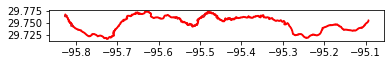

In [297]:
fig, ax = plt.subplots()
geodf_buffaloBayouWithBuffer.plot(ax=ax, edgecolor="red");

## Let's Convert that to a single GEOJSON Polygon

Dissolve by FNIS name

In [298]:
geodf_buffaloBayouWithBufferDissolved = geodf_buffaloBayouWithBuffer.dissolve(by='gnis_name')
geodf_buffaloBayouWithBufferDissolved

,geometry,permanent_,fdate,resolution,gnis_id,lengthkm,reachcode,flowdir,wbarea_per,ftype,fcode,mainpath,innetwork,visibility,SHAPE_Leng,Enabled,ObjectID
gnis_name,,,,,,,,,,,,,,,,,
Buffalo Bayou,"POLYGON ((-95.72735 29.71992, -95.72724 29.719...",113254399,2012-01-04,2,01372802,0.359,12040104000055,1,120007513,460,46006,0,1,5000000,0.003579,1,48


In [299]:
path_buffaloBayouTestGeojson = os.path.join(data_folder_path,"buffaloBayouTestGeojson.geojson")

In [300]:
geodf_buffaloBayouWithBufferDissolved.to_file(path_buffaloBayouTestGeojson, driver="GeoJSON")  

In [301]:
geodf_buffaloBayou_projectedOnlyBufferGeoRead = gpd.read_file(path_buffaloBayouTestGeojson )

In [302]:
geodf_buffaloBayou_projectedOnlyBufferGeoRead.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [303]:
import fiona

In [304]:
with fiona.open(path_buffaloBayouTestGeojson, "r") as shapefile:
    buffaloBayou_shapes = [feature["geometry"] for feature in shapefile]

## Load Land Cover Raster 

In [305]:
import dask.distributed
from matplotlib.colors import ListedColormap
from pystac_client import Client

import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import planetary_computer as pc
import rasterio
import rasterio.features
import stackstac

# Set the environment variable PC_SDK_SUBSCRIPTION_KEY, or set it here.
# The Hub sets PC_SDK_SUBSCRIPTION_KEY automatically.
# pc.settings.set_subscription_key(<YOUR API Key>)

In [306]:
area_of_interest = {
    "type": "Polygon",
    "coordinates": [
        [
            (-96.299, 30.66),
            (-94.63, 30.66),
            (-96.299, 28.685),
            (-94.63, 28.685),
            (-96.299, 30.66),
        ]
    ],
}

NOTE: The area of interest on this example notebook has [] instead of () around the lat/long coordinates! which breaks 

In [307]:
catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

search = catalog.search(collections=["io-lulc-9-class"], intersects=area_of_interest)

# Check how many items were returned
items = list(search.get_items())
print(f"Returned {len(items)} Items")


Returned 10 Items


In [308]:
items

[<Item id=15R-2021>,
 <Item id=14R-2021>,
 <Item id=15R-2020>,
 <Item id=14R-2020>,
 <Item id=15R-2019>,
 <Item id=14R-2019>,
 <Item id=15R-2018>,
 <Item id=14R-2018>,
 <Item id=15R-2017>,
 <Item id=14R-2017>]

In [309]:
items[0]

ID: 15R-2021
"Bounding Box: [-96.0, 28.48075339, -90.0, 32.0]"
datetime: None
"proj:bbox: [194773.70566898846, 2654231.5057707, 805223.7056689884, 3544361.5057707]"
proj:epsg: 32615
io:tile_id: 15R
"proj:shape: [89013, 61045]"
end_datetime: 2022-01-01T00:00:00Z
"proj:transform: [10.0, 0.0, 194773.70566898846, 0.0, -10.0, 3544361.5057707]"
start_datetime: 2021-01-01T00:00:00Z
io:supercell_id: 15R


We only one the most recent data, so ignoring the part of the example that treats each time slice as different layer

In [310]:
items = [items[0]]

In [311]:
# The STAC metadata contains some information we'll want to use when creating
# our merged dataset. Get the EPSG code of the first item and the nodata value.
item = items[0]
signed_items = [pc.sign(item).to_dict() for item in items]
bounds_latlon = rasterio.features.bounds(area_of_interest)

# Create a single DataArray from out multiple resutls with the corresponding
# rasters projected to a single CRS. Note that we set the dtype to ubyte, which
# matches our data, since stackstac will use float64 by default.
stack = (
    stackstac.stack(
        signed_items,
        dtype=np.ubyte,
        fill_value=255,
        bounds_latlon=bounds_latlon,
        sortby_date=False,
    )
    .assign_coords(
        time=pd.to_datetime([item.properties["start_datetime"] for item in items])
        .tz_convert(None)
        .to_numpy()
    )
    .sortby("time")
)

stack


,Array,Chunk
Bytes,352.57 MiB,1.00 MiB
Shape,"(1, 1, 22240, 16623)","(1, 1, 1024, 1024)"
Count,376 Tasks,374 Chunks
Type,uint8,numpy.ndarray


In [312]:
client = dask.distributed.Client(processes=False)
print(f"/proxy/{client.scheduler_info()['services']['dashboard']}/status")


/proxy/59768/status


/Users/justingosses/opt/miniconda3/envs/river-maps-experiments/lib/python3.10/site-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 59768 instead
  warnings.warn(


In [313]:
# merged = stack.groupby("time").apply(stackstac.mosaic).compute()
merged = stack.squeeze().compute()

In [314]:
type(merged)

xarray.core.dataarray.DataArray

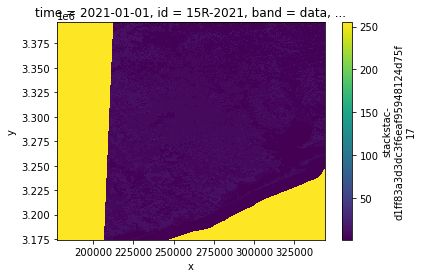

In [315]:
#### THIS MIGHT TAKE SEVERAL MINUTES
g = merged.plot()

In [316]:
from pystac.extensions.item_assets import ItemAssetsExtension

collection = catalog.get_collection("io-lulc-9-class")
ia = ItemAssetsExtension.ext(collection)

x = ia.item_assets["data"]
class_names = {x["summary"]: x["values"][0] for x in x.properties["file:values"]}
values_to_classes = {v: k for k, v in class_names.items()}
class_count = len(class_names)
class_names


{'No Data': 0,
 'Water': 1,
 'Trees': 2,
 'Flooded vegetation': 4,
 'Crops': 5,
 'Built area': 7,
 'Bare ground': 8,
 'Snow/ice': 9,
 'Clouds': 10,
 'Rangeland': 11}

In [317]:
with rasterio.open(pc.sign(item.assets["data"].href)) as src:
    colormap_def = src.colormap(1)  # get metadata colormap for band 1
    colormap = [
        np.array(colormap_def[i]) / 255 for i in range(max(class_names.values()))
    ]  # transform to matplotlib color format

cmap = ListedColormap(colormap)


In [318]:
ccrs.epsg(epsg)

_EPSGProjection(32615)

In [319]:
#### THIS ERRORS OUT MAYBE AS ONLY ONE LAYER?
# vmin = 0
# vmax = max(class_names.values())
# epsg = merged.epsg.item()

# p = merged.plot(
#     subplot_kws=dict(projection=ccrs.epsg(epsg)),
#     col="time",
#     transform=ccrs.epsg(epsg),
#     cmap=cmap,
#     vmin=vmin,
#     vmax=vmax,
#     figsize=(16, 6),
# )
# ticks = np.linspace(0.5, 10.5, 11)
# labels = [values_to_classes.get(i, "") for i in range(cmap.N)]
# p.cbar.set_ticks(ticks, labels=labels)
# p.cbar.set_label("Class")


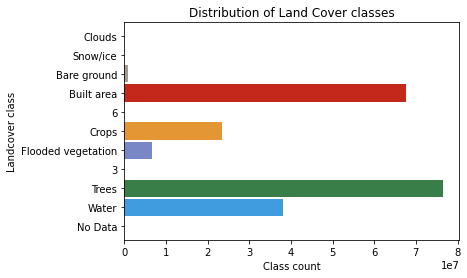

In [320]:
colors = list(cmap.colors)

ax = (
    pd.value_counts(merged.data.ravel(), sort=False)
    .sort_index()
    .reindex(range(cmap.N), fill_value=0)
    .rename(values_to_classes)
    .plot.barh(color=colors, rot=0, width=0.9)
)
ax.set(
    title="Distribution of Land Cover classes",
    ylabel="Landcover class",
    xlabel="Class count",
);

In [321]:
pd.value_counts(merged.data.ravel())

255    102244953
2       76590456
7       67567123
11      54129338
1       38164810
5       23532519
4        6547597
8         918591
10           133
dtype: int64

## Now Let's Get Those Land Cover Statistics Just on Buffer Around Buffalo Bayou

In [322]:
area_of_interest

{'type': 'Polygon',
 'coordinates': [[(-96.299, 30.66),
   (-94.63, 30.66),
   (-96.299, 28.685),
   (-94.63, 28.685),
   (-96.299, 30.66)]]}

In [323]:
buffaloBayou_shapes

[{'type': 'Polygon',
  'coordinates': [[(-95.72734547223297, 29.71991782037045),
    (-95.72724164320553, 29.719912475767963),
    (-95.72713893023202, 29.719896379905535),
    (-95.7268500635658, 29.71983557990562),
    (-95.72676690542453, 29.719814312465314),
    (-95.7266858774209, 29.719785992099684),
    (-95.7266075765353, 29.719750827461304),
    (-95.72612657653606, 29.719509494128353),
    (-95.72603639425918, 29.7194582268962),
    (-95.7259520083183, 29.719397892949374),
    (-95.72587432680508, 29.719329141551857),
    (-95.72553119347226, 29.718992141552366),
    (-95.72546866555427, 29.718924814534986),
    (-95.72541258133054, 29.718852032479198),
    (-95.72536341430151, 29.71877440985972),
    (-95.7253215795681, 29.71869260201855),
    (-95.72528743032706, 29.718607299632104),
    (-95.72526125488906, 29.718519222880104),
    (-95.72524327424466, 29.7184291153653),
    (-95.72516438239235, 29.717910634403797),
    (-95.72502702475634, 29.717796517855326),
    (-95.72

In [324]:
# The STAC metadata contains some information we'll want to use when creating
# our merged dataset. Get the EPSG code of the first item and the nodata value.
item = items[0]
signed_items = [pc.sign(item).to_dict() for item in items]
bounds_latlon = rasterio.features.bounds(buffaloBayou_shapes[0])

# Create a single DataArray from out multiple resutls with the corresponding
# rasters projected to a single CRS. Note that we set the dtype to ubyte, which
# matches our data, since stackstac will use float64 by default.
stackClipped = (
    stackstac.stack(
        signed_items,
        dtype=np.ubyte,
        fill_value=255,
        bounds_latlon=bounds_latlon,
        sortby_date=False,
    )
    .assign_coords(
        time=pd.to_datetime([item.properties["start_datetime"] for item in items])
        .tz_convert(None)
        .to_numpy()
    )
    .sortby("time")
)

stackClipped


<xarray.DataArray 'stackstac-518e5822893ee21da7ebe6848b886591' (time: 1,
                                                                band: 1,
                                                                y: 808, x: 7131)>
dask.array<fetch_raster_window, shape=(1, 1, 808, 7131), dtype=uint8, chunksize=(1, 1, 808, 1024), chunktype=numpy.ndarray>
Coordinates: (12/16)
  * time             (time) datetime64[ns] 2021-01-01
    id               (time) <U8 '15R-2021'
  * band             (band) <U4 'data'
  * x                (x) float64 2.264e+05 2.265e+05 ... 2.977e+05 2.978e+05
  * y                (y) float64 3.297e+06 3.297e+06 ... 3.289e+06 3.289e+06
    start_datetime   <U20 '2021-01-01T00:00:00Z'
    ...               ...
    io:supercell_id  <U3 '15R'
    proj:shape       object {61045, 89013}
    io:tile_id       <U3 '15R'
    file:size        int64 113777943
    raster:bands     object {'nodata': 0, 'spatial_resolution': 10}
    epsg             int64 32615
Attributes:
    spec:        RasterSpec(epsg=32615, bounds=(226450.0, 3289120.0, 297760.0...
    crs:         epsg:32615
    transform:   | 10.00, 0.00, 226450.00|\n| 0.00,-10.00, 3297200.00|\n| 0.0...
    resolution:  10.0

In [325]:
mergedClipped = stackClipped.squeeze().compute()

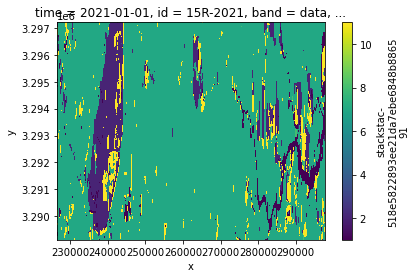

In [326]:
mergedClippedPlotted = mergedClipped.plot()

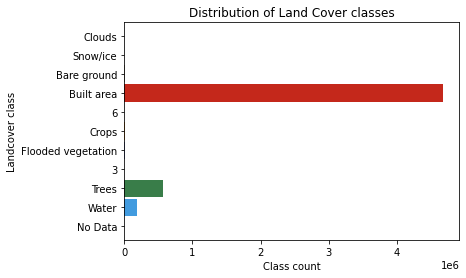

In [327]:
colors = list(cmap.colors)

ax = (
    pd.value_counts(mergedClipped.data.ravel(), sort=False)
    .sort_index()
    .reindex(range(cmap.N), fill_value=0)
    .rename(values_to_classes)
    .plot.barh(color=colors, rot=0, width=0.9)
)
ax.set(
    title="Distribution of Land Cover classes",
    ylabel="Landcover class",
    xlabel="Class count",
);

This theoretically could be replicated for any river body...

https://carpentries-incubator.github.io/geospatial-python/aio/index.html

https://github.com/perrygeo/python-rasterstats

https://discourse.pangeo.io/t/intersecting-shapefiles-and-raster-data-at-scale-good-design-patterns/1188